## importing libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## reading files into 3 folders

In [2]:
winter=glob.glob('winter/*.jpg')
spring=glob.glob('spring/*.jpg')
monsoon=glob.glob('monsoon/*.jpg')

In [4]:
len(monsoon),len(winter),len(spring)

(68, 90, 78)

## reading image  data from all files and storing it in variables and labels

In [26]:
image=[]
label=[]

for i in winter:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

for i in spring:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in monsoon:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

In [27]:
label_names={0:'winter',1:'spring',2:'monsoon'}
for i in label_names:
     print(label_names[i])

winter
spring
monsoon


## plot images

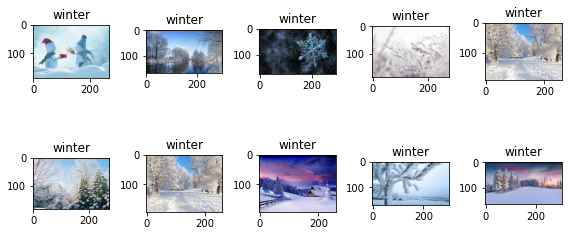

In [30]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

## Shuffling images

In [32]:
image,label= shuffle(image,label)

## plotting shuffled images

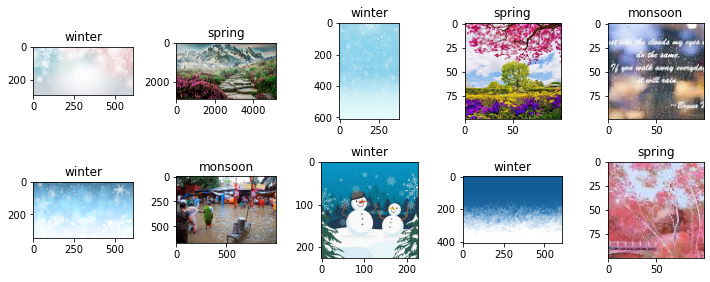

In [34]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

## check shape of images

In [35]:
for i in range(5):
    print(image[i].shape)

(297, 612, 3)
(2916, 5184, 3)
(612, 382, 3)
(100, 100, 3)
(100, 100, 3)


## Resizing images

In [36]:
x=[]
for i in image:
    x.append(resize(i,(450,450,3)))

## converting images to numpy arrays and storing it as x and y

In [37]:
x=np.array(x)
y=np.array(label)

In [39]:
y

array([0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0])

In [41]:
x.shape

(236, 450, 450, 3)

In [44]:
x[0]

array([[[0.70250745, 0.81231137, 0.85544863],
        [0.70196078, 0.81176471, 0.85490196],
        [0.70196078, 0.81176471, 0.85490196],
        ...,
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745]],

       [[0.70353647, 0.81334039, 0.85647765],
        [0.70196078, 0.81176471, 0.85490196],
        [0.70196078, 0.81176471, 0.85490196],
        ...,
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745]],

       [[0.70528235, 0.81508627, 0.85822353],
        [0.70254902, 0.81235294, 0.8554902 ],
        [0.70201961, 0.81182353, 0.85496078],
        ...,
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745],
        [0.83529412, 0.74509804, 0.76862745]],

       ...,

       [[0.79607843, 0.82352941, 0.84705882],
        [0.79607843, 0.82352941, 0.84705882],
        [0.79607843, 0

In [42]:
d1,d2,d3,d4=x.shape   

## reshaping into 1 dimension

In [45]:
x=x.reshape((d1,d2*d3*d4))  ## flattening array

In [47]:
x[0]    ## after flattening array the image converted to vectors

array([0.70250745, 0.81231137, 0.85544863, ..., 0.80392157, 0.83137255,
       0.85490196])

## Train Test Split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Create SVM model and train 

In [49]:
model=SVC()

In [50]:
model.fit(x_train,y_train)

SVC()

In [51]:
pred=model.predict(x_test)

In [61]:
pred

array([0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1])

In [52]:
model.score(x_train,y_train)

0.943502824858757

##  Plotting predicted values

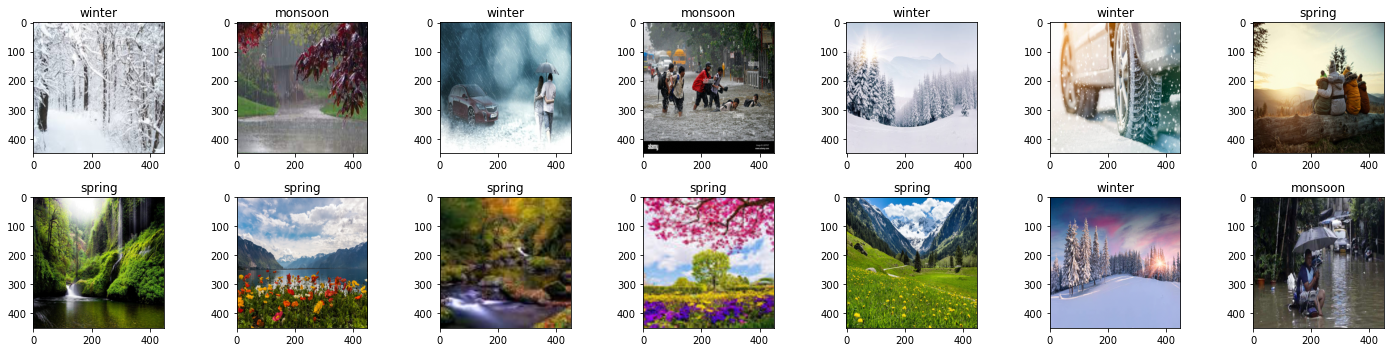

In [59]:
plt.figure(figsize=(20,5))
for i in range(14):
    plt.subplot(2,7,i+1)
    plt.imshow(x_test[i].reshape(450,450,3))  ## reshape function used coz we cant plot flattened array
    plt.title(label_names[pred[i]])
plt.tight_layout()

## Evaluating model

In [53]:
accuracy_score(y_test,pred)

0.711864406779661

<AxesSubplot:>

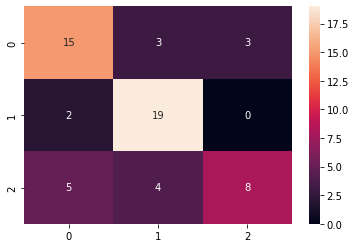

In [54]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.73      0.90      0.81        21
           2       0.73      0.47      0.57        17

    accuracy                           0.71        59
   macro avg       0.71      0.70      0.69        59
weighted avg       0.71      0.71      0.70        59



***